# Table of contents

<ul>
<li>What is machine learning?</li>
<li>Preprocessing</li>
    <ul>
        <li>Identifying and handling the missing values</li>
        <li>Identifying outliers</li>
        <li>Encoding the categorical data</li>
        <li>Transforming the dataset</li>
        <ul>
            <li>Feature scaling</li>
            <ul>
                <li>Standardization</li>
                <li>Normalization</li>
            </ul>
            <li>Dimension reduction</li>
            <ul>
                <li>Principal Component Analysis (PCA)</li>
            </ul>
        </ul>
        <li>Train test split</li>
    </ul>
<li>Feature selection</li>
<li>Model selection</li>
<ul>
    <li>Supervised learning</li>
    <ul>
        <li>Classification</li>
        <ul>
            <li>KNN</li>
            <li>SVM</li>
            <li>Random forest</li>
            <li>Decision tree</li>
            <li>Logistic regression</li>
        </ul>
        <li>Regression</li>
        <ul>
            <li>Linear regression</li>
            <li>Polynomial regression</li>
            <li>None linear regression</li>
            <li>Multiple linear regression</li>
        </ul>
    </ul>
    <li>Unsupervised learning</li>
    <ul>
        <li>Kmeans</li>
        <li>DBSCAN</li>
    </ul>
    <li>Semi supervised learning</li>
</ul>
<li>Model evaluation</li>
<ul>
    <li>Classification</li>
    <ul>
        <li>Jaccard</li>
        <li>F1-score</li>
        <li>log-loss</li>
    </ul>
    <li>Clustering</li>
    <ul>
        <li>Sum of Squared Error (SSE) score</li>
        <li>Silhouette coefficient</li>
    </ul>
</ul>
<li>Prediction</li>
</ul>

# What is machine learning?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cell_samples.csv')
df

ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0    1000025    5.0       1.0          1        1          2.0       1   
1    1002945    5.0       4.0          4        5          7.0      10   
2    1015425    3.0       1.0          1        1          2.0       2   
3    1016277    6.0       8.0          8        1          3.0       4   
4    1017023    4.0       1.0          1        3          2.0       1   
..       ...    ...       ...        ...      ...          ...     ...   
694   776715    3.0       1.0          1        1          3.0       2   
695   841769    2.0       1.0          1        1          2.0       1   
696   888820    5.0      10.0         10        3          7.0       3   
697   897471    4.0       8.0          6        4          3.0     NaN   
698   897471    4.0       8.0          8        5          4.0       5   

     BlandChrom  NormNucl  Mit      Cancer  
0             3       1.0    1    noCancer  
1             3       2.0    1    noCancer  
2             3       1.0    1    noCancer  
3             3       7.0    1    noCancer  
4             3       1.0    1    noCancer  
..          ...       ...  ...         ...  
694           1       1.0    1    noCancer  
695           1       1.0    1    noCancer  
696           8      10.0    2  haveCancer  
697          10       6.0    1  haveCancer  
698          10       4.0    1  haveCancer  

[699 rows x 11 columns]

In [3]:
df.drop(columns=['ID'], inplace=True)
df

Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  BlandChrom  \
0      5.0       1.0          1        1          2.0       1           3   
1      5.0       4.0          4        5          7.0      10           3   
2      3.0       1.0          1        1          2.0       2           3   
3      6.0       8.0          8        1          3.0       4           3   
4      4.0       1.0          1        3          2.0       1           3   
..     ...       ...        ...      ...          ...     ...         ...   
694    3.0       1.0          1        1          3.0       2           1   
695    2.0       1.0          1        1          2.0       1           1   
696    5.0      10.0         10        3          7.0       3           8   
697    4.0       8.0          6        4          3.0     NaN          10   
698    4.0       8.0          8        5          4.0       5          10   

     NormNucl  Mit      Cancer  
0         1.0    1    noCancer  
1         2.0    1    noCancer  
2         1.0    1    noCancer  
3         7.0    1    noCancer  
4         1.0    1    noCancer  
..        ...  ...         ...  
694       1.0    1    noCancer  
695       1.0    1    noCancer  
696      10.0    2  haveCancer  
697       6.0    1  haveCancer  
698       4.0    1  haveCancer  

[699 rows x 10 columns]

# Preprocessing

## Handling missing values

In [4]:
df.isna().sum()

Clump          3
UnifSize       1
UnifShape      0
MargAdh        0
SingEpiSize    2
BareNuc        2
BlandChrom     0
NormNucl       1
Mit            0
Cancer         0
dtype: int64

In [5]:
df = df.dropna() # Not a good idea!
df.reset_index(drop=True)

Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  BlandChrom  \
0      5.0       1.0          1        1          2.0       1           3   
1      5.0       4.0          4        5          7.0      10           3   
2      3.0       1.0          1        1          2.0       2           3   
3      6.0       8.0          8        1          3.0       4           3   
4      4.0       1.0          1        3          2.0       1           3   
..     ...       ...        ...      ...          ...     ...         ...   
685    3.0       1.0          1        1          2.0       1           2   
686    3.0       1.0          1        1          3.0       2           1   
687    2.0       1.0          1        1          2.0       1           1   
688    5.0      10.0         10        3          7.0       3           8   
689    4.0       8.0          8        5          4.0       5          10   

     NormNucl  Mit      Cancer  
0         1.0    1    noCancer  
1         2.0    1    noCancer  
2         1.0    1    noCancer  
3         7.0    1    noCancer  
4         1.0    1    noCancer  
..        ...  ...         ...  
685       1.0    2    noCancer  
686       1.0    1    noCancer  
687       1.0    1    noCancer  
688      10.0    2  haveCancer  
689       4.0    1  haveCancer  

[690 rows x 10 columns]

In [6]:
df.dtypes

Clump          float64
UnifSize       float64
UnifShape        int64
MargAdh          int64
SingEpiSize    float64
BareNuc         object
BlandChrom       int64
NormNucl       float64
Mit              int64
Cancer          object
dtype: object

In [9]:
df[~df['BareNuc'].str.isdigit()]

Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  BlandChrom  \
23     8.0       4.0          5        1          2.0       ?           7   
40     6.0       6.0          6        9          6.0       ?           7   
139    1.0       1.0          1        1          1.0       ?           2   
145    1.0       1.0          3        1          2.0       ?           2   
158    1.0       1.0          2        1          3.0       ?           1   
164    5.0       1.0          1        1          2.0       ?           3   
235    3.0       1.0          4        1          2.0       ?           3   
249    3.0       1.0          1        1          2.0       ?           3   
275    3.0       1.0          3        1          2.0       ?           2   
292    8.0       8.0          8        1          2.0       ?           6   
294    1.0       1.0          1        1          2.0       ?           2   
297    5.0       4.0          3        1          2.0       ?           2   
315    4.0       6.0          5        6          7.0       ?           4   
321    3.0       1.0          1        1          2.0       ?           3   
411    1.0       1.0          1        1          1.0       ?           2   
617    1.0       1.0          1        1          1.0       ?           1   

     NormNucl  Mit      Cancer  
23        3.0    1  haveCancer  
40        8.0    1    noCancer  
139       1.0    1    noCancer  
145       1.0    1    noCancer  
158       1.0    1    noCancer  
164       1.0    1    noCancer  
235       1.0    1    noCancer  
249       1.0    1    noCancer  
275       1.0    1    noCancer  
292      10.0    1  haveCancer  
294       1.0    1    noCancer  
297       3.0    1    noCancer  
315       9.0    1    noCancer  
321       1.0    1    noCancer  
411       1.0    1    noCancer  
617       1.0    1    noCancer

In [10]:
df = df[df['BareNuc'].str.isdigit()]
df.reset_index(drop=True)

Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  BlandChrom  \
0      5.0       1.0          1        1          2.0       1           3   
1      5.0       4.0          4        5          7.0      10           3   
2      3.0       1.0          1        1          2.0       2           3   
3      6.0       8.0          8        1          3.0       4           3   
4      4.0       1.0          1        3          2.0       1           3   
..     ...       ...        ...      ...          ...     ...         ...   
669    3.0       1.0          1        1          2.0       1           2   
670    3.0       1.0          1        1          3.0       2           1   
671    2.0       1.0          1        1          2.0       1           1   
672    5.0      10.0         10        3          7.0       3           8   
673    4.0       8.0          8        5          4.0       5          10   

     NormNucl  Mit      Cancer  
0         1.0    1    noCancer  
1         2.0    1    noCancer  
2         1.0    1    noCancer  
3         7.0    1    noCancer  
4         1.0    1    noCancer  
..        ...  ...         ...  
669       1.0    2    noCancer  
670       1.0    1    noCancer  
671       1.0    1    noCancer  
672      10.0    2  haveCancer  
673       4.0    1  haveCancer  

[674 rows x 10 columns]

## Encoding the categorical data

In [11]:
from sklearn.preprocessing import LabelEncoder  

label_encoder_cancer= LabelEncoder()  

df['Cancer'] = label_encoder_cancer.fit_transform(df['Cancer']) 
df

Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  BlandChrom  \
0      5.0       1.0          1        1          2.0       1           3   
1      5.0       4.0          4        5          7.0      10           3   
2      3.0       1.0          1        1          2.0       2           3   
3      6.0       8.0          8        1          3.0       4           3   
4      4.0       1.0          1        3          2.0       1           3   
..     ...       ...        ...      ...          ...     ...         ...   
693    3.0       1.0          1        1          2.0       1           2   
694    3.0       1.0          1        1          3.0       2           1   
695    2.0       1.0          1        1          2.0       1           1   
696    5.0      10.0         10        3          7.0       3           8   
698    4.0       8.0          8        5          4.0       5          10   

     NormNucl  Mit  Cancer  
0         1.0    1       1  
1         2.0    1       1  
2         1.0    1       1  
3         7.0    1       1  
4         1.0    1       1  
..        ...  ...     ...  
693       1.0    2       1  
694       1.0    1       1  
695       1.0    1       1  
696      10.0    2       0  
698       4.0    1       0  

[674 rows x 10 columns]

## Transforming the dataset

### Feature scaling

#### Standardization

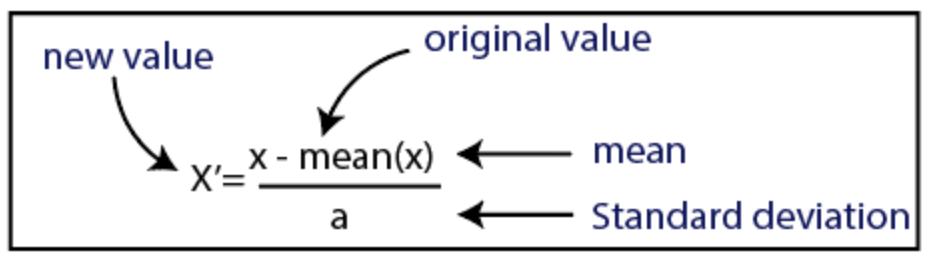

In [12]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
st_df = scaler.fit_transform(df) 
st_df

array([[ 0.20492807, -0.69695843, -0.7369664 , ..., -0.60943424,
        -0.34926127,  0.72687322],
       [ 0.20492807,  0.28373047,  0.26785225, ..., -0.2808273 ,
        -0.34926127,  0.72687322],
       [-0.50703851, -0.69695843, -0.7369664 , ..., -0.60943424,
        -0.34926127,  0.72687322],
       ...,
       [-0.8630218 , -0.69695843, -0.7369664 , ..., -0.60943424,
        -0.34926127,  0.72687322],
       [ 0.20492807,  2.24510825,  2.27748956, ...,  2.34802826,
         0.22489018, -1.37575574],
       [-0.15105522,  1.59131566,  1.60761046, ...,  0.37638659,
        -0.34926127, -1.37575574]])

#### Normalization

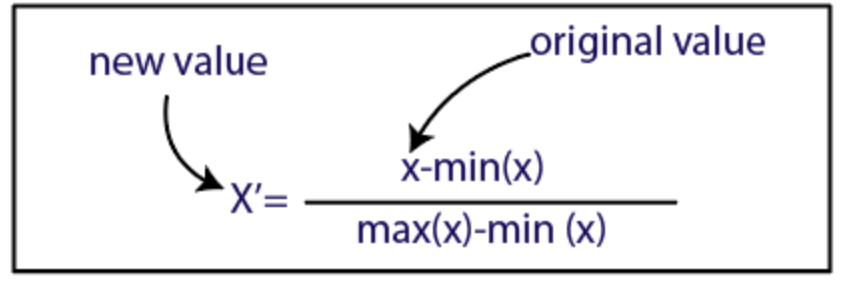

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  
norm_df = scaler.fit_transform(df) 
norm_df

array([[0.44444444, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.44444444, 0.33333333, 0.33333333, ..., 0.11111111, 0.        ,
        1.        ],
       [0.22222222, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.11111111, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.44444444, 1.        , 1.        , ..., 1.        , 0.11111111,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 0.33333333, 0.        ,
        0.        ]])

### Dimension reduction

#### Principal Component Analysis

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)
df_pca = pca.transform(df)
df_pca

array([[-4.45953716,  0.13789185],
       [ 4.82512971, -4.76671436],
       [-4.60859293, -0.6196078 ],
       ...,
       [-5.92653646,  0.19132206],
       [10.31932599,  7.15109663],
       [ 7.56586936,  0.98106619]])

In [17]:
pca.explained_variance_ratio_

array([0.69280251, 0.07155844])

## Train test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.2, random_state=42)

# print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (539, 10) (539, 10)
Testing set shape: (135, 10) (135, 10)


What is overfitting?

# Model selection

## Supervised learning

### Classification

#### KNN

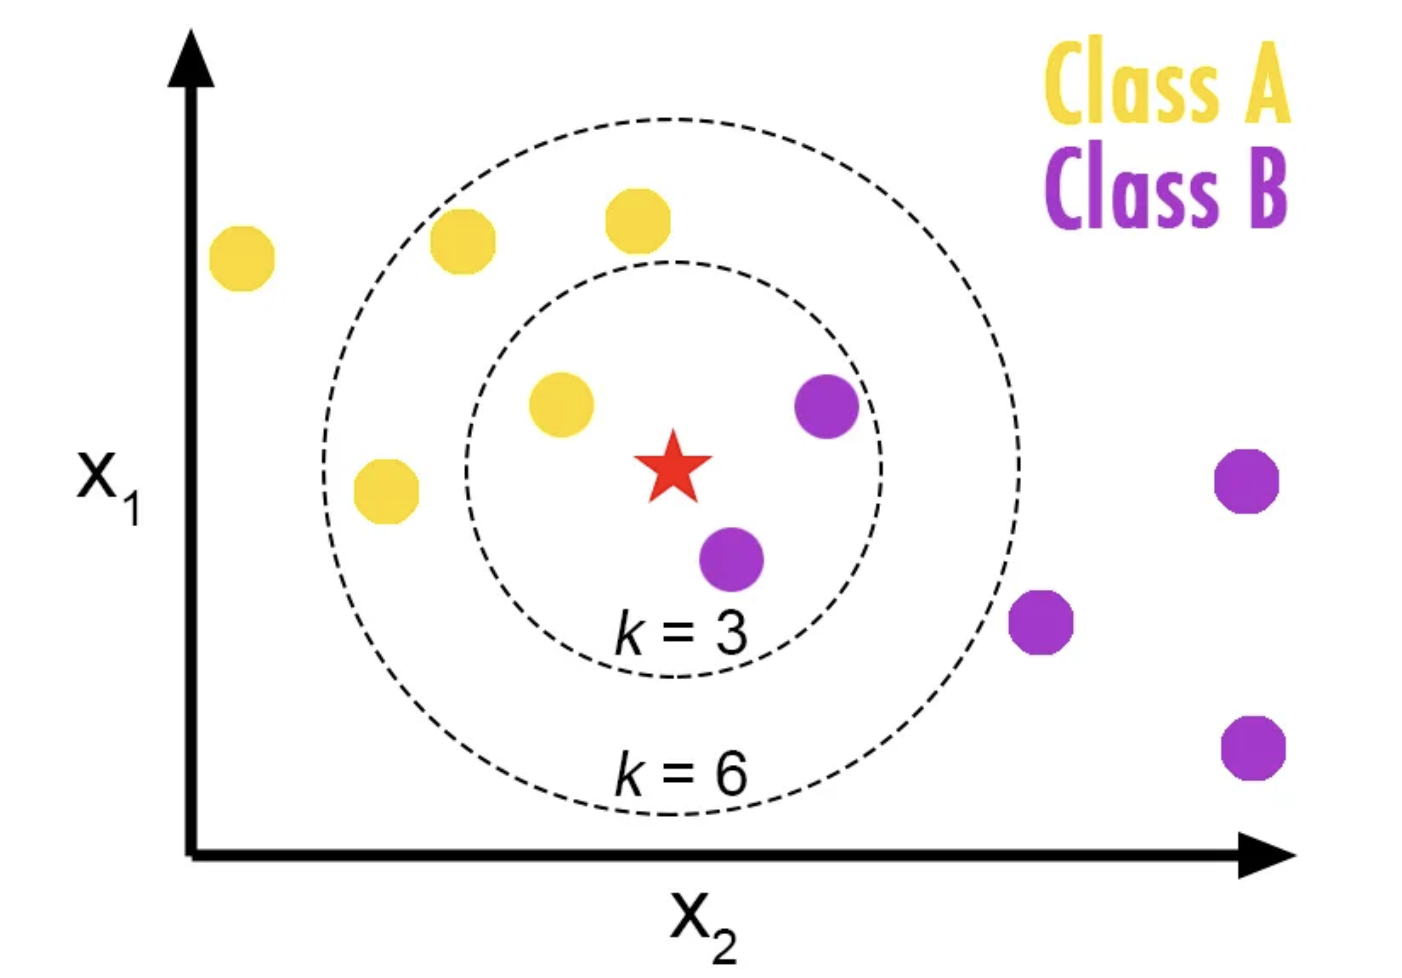

In [20]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
                                                    norm_df[:, :-1], 
                                                    norm_df[:, -1], 
                                                    test_size=0.2, 
                                                    random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)

# train the model on the training set
knn.fit(X_train, y_train)

# predict the labels of the test set
y_pred = knn.predict(X_test)

#### Evaluation

In [21]:
from sklearn import metrics

##### Jaccard

In [22]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 98.52%


##### F1 score

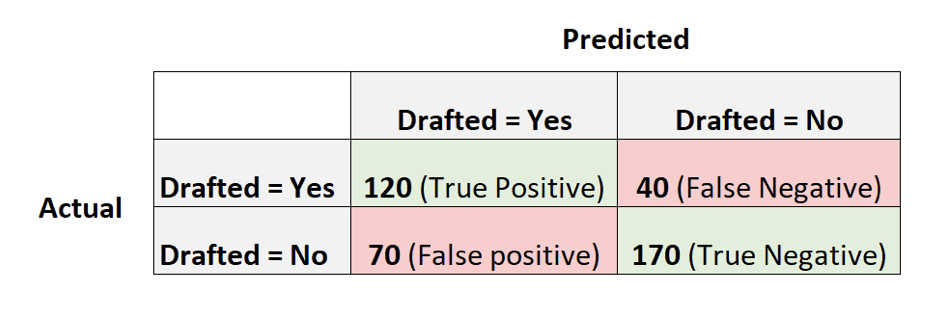

<ul>
<li>Precision: Correct positive predictions relative to total positive predictions</li>
<li>Recall: Correct positive predictions relative to total actual positives</li>
</ul> 
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [23]:
acc = metrics.f1_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 98.82%


##### Log loss

In [24]:
acc = metrics.log_loss(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 53.40%


#### Select optimal K

In [25]:
Ks = 10
acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    acc[n-1] = metrics.accuracy_score(y_test, yhat)

acc

array([0.97037037, 0.98518519, 0.97777778, 0.99259259, 0.99259259,
       0.98518519, 0.98518519, 0.99259259, 0.97777778])

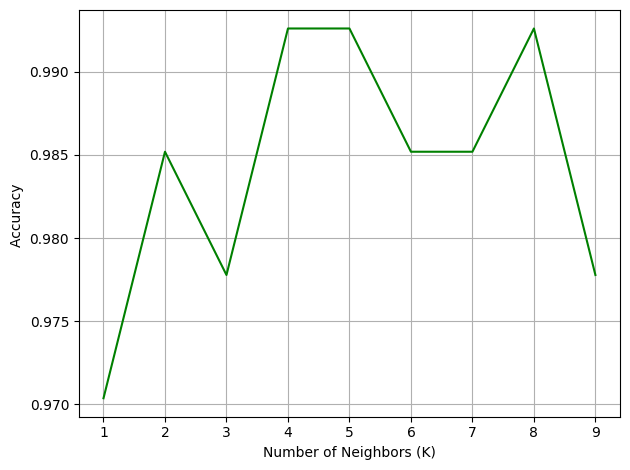

In [26]:
plt.plot(range(1,Ks),acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.grid()
plt.show()

#### SVM

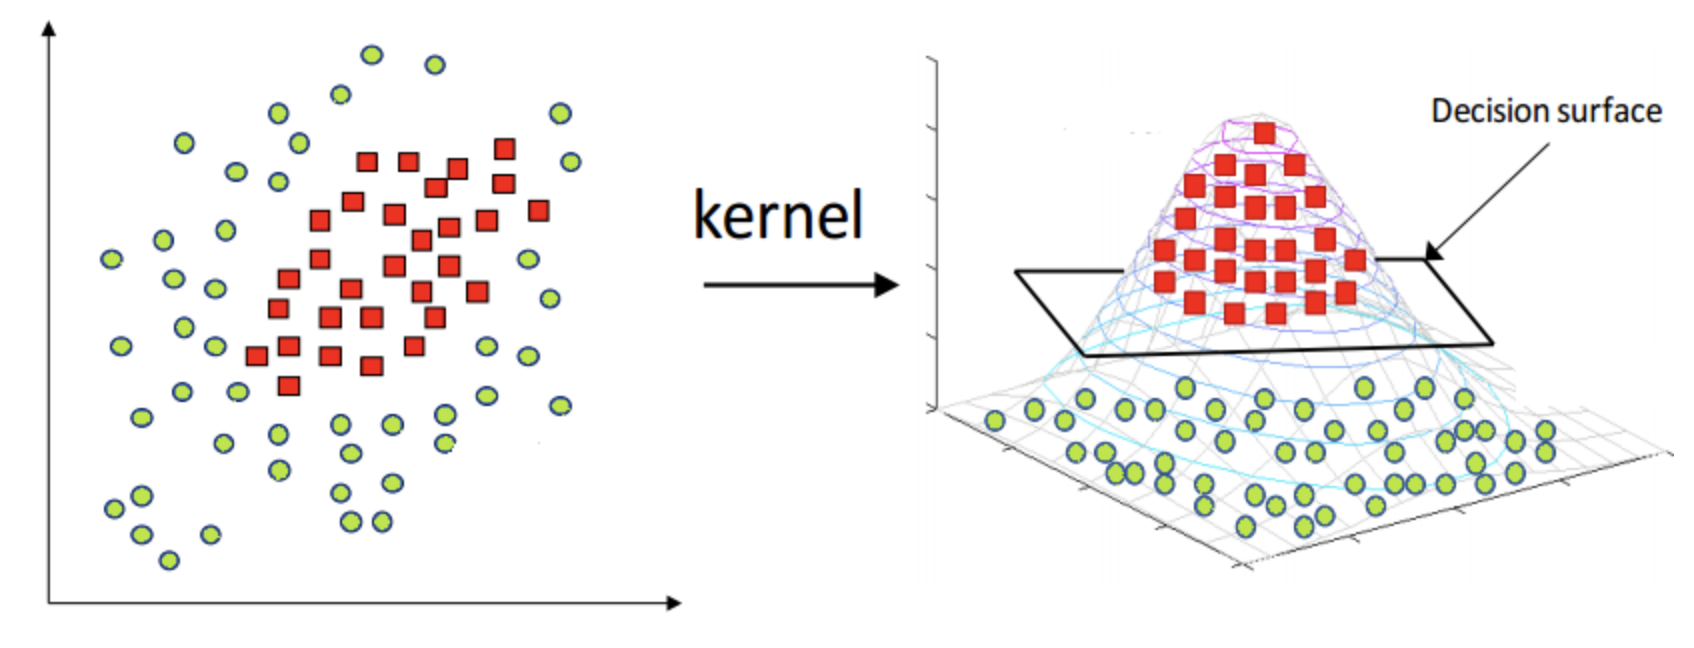

In [31]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf') # Other kernels: linear, poly and sigmoid

# Fit the SVM model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9925925925925926


#### Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fit the Random Forest model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


#### Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# Fit the Decision Tree model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


#### Logistic regression

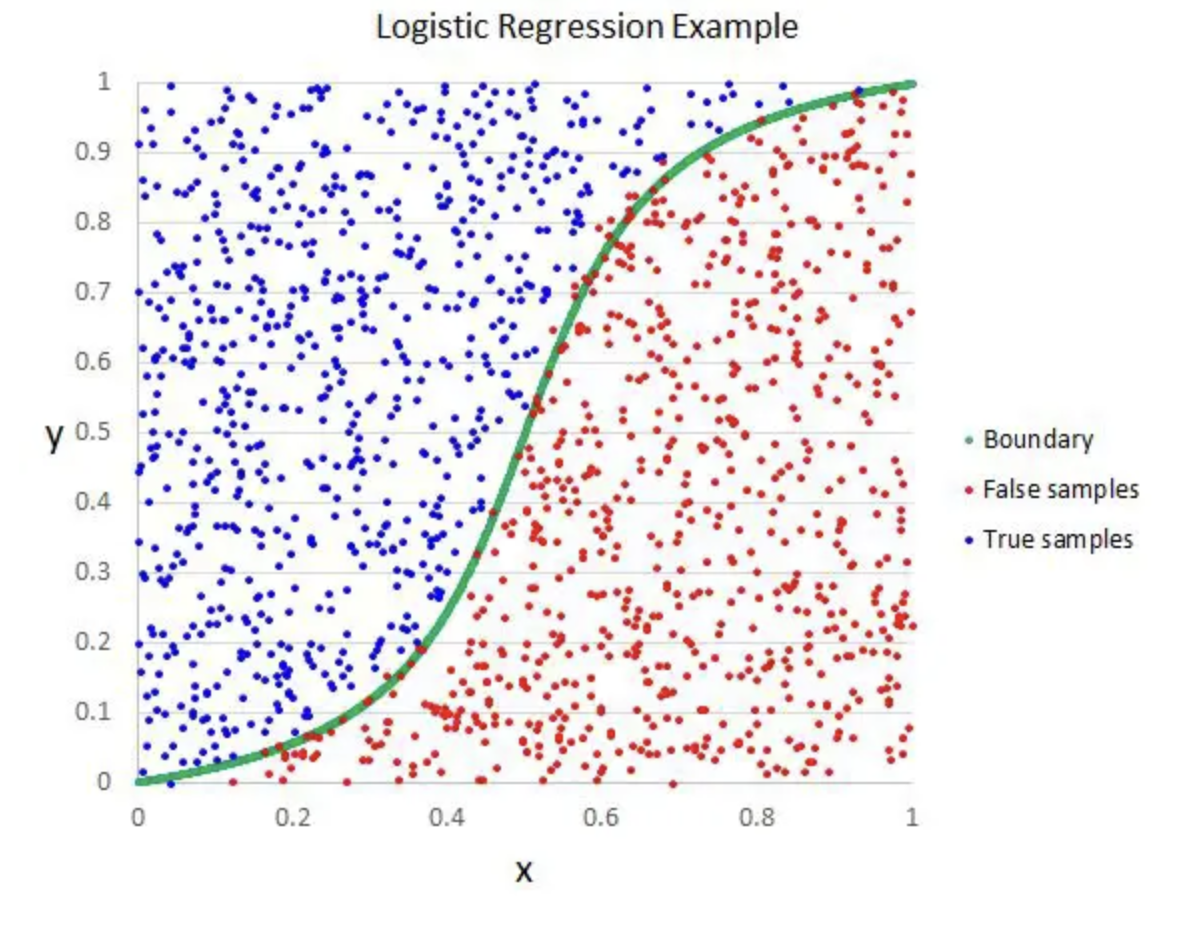

Uses Only for binary classification

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Fit the Logistic Regression model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9851851851851852


### Regression

#### Linear regression

In [35]:
df_r = pd.read_csv("FuelConsumption.csv")
df_r = df_r[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df_r

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[1067 rows x 4 columns]

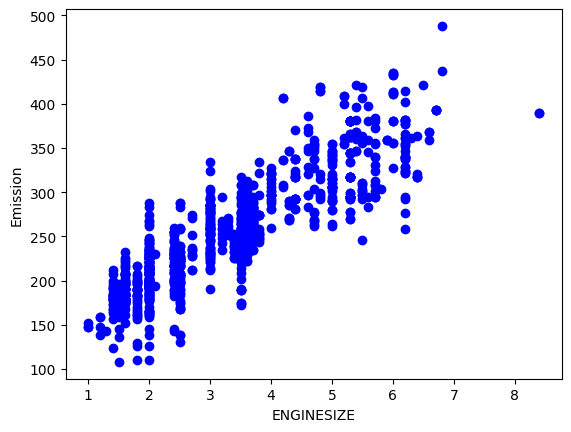

In [36]:
plt.scatter(df_r.ENGINESIZE, df_r.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

In [37]:
msk = np.random.rand(len(df_r)) < 0.8
train = df_r[msk]
test = df_r[~msk]

In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']].to_numpy()
train_y = train[['CO2EMISSIONS']].to_numpy()
regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.38712813]]
Intercept:  [124.09147792]


<pre>y = aX + b
Coefficient = a
Intercept = b</pre>

Text(0, 0.5, 'Emission')

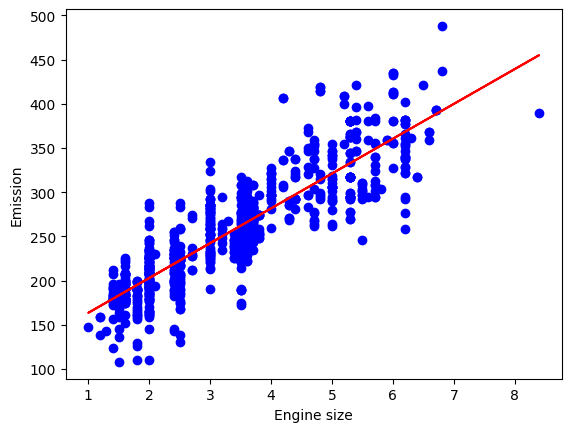

In [39]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Polynomial regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [41]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [42]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.67163513 -1.50792925]]
Intercept:  [106.16214441]


Text(0, 0.5, 'Emission')

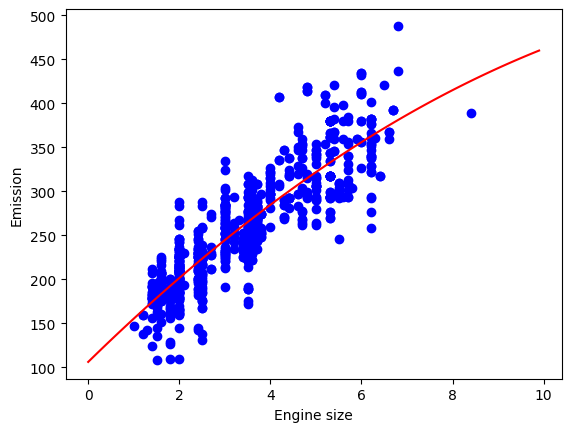

In [43]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.coef_[0][2]*np.power(XX, 2) + clf.coef_[0][1]*XX + clf.intercept_[0]
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

##### r2 score

In [44]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("R2-score: %.2f" % r2_score(test_y,test_y_ ) ) # Higher is better (0-1)

R2-score: 0.78


## Unsupervised learning

### Kmeans

In [45]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, n_init=12)

# Fit the K-means model to the data
kmeans.fit(df)

# Get the cluster labels and cluster centers
labels = kmeans.labels_

### SSE score (Elbow method)

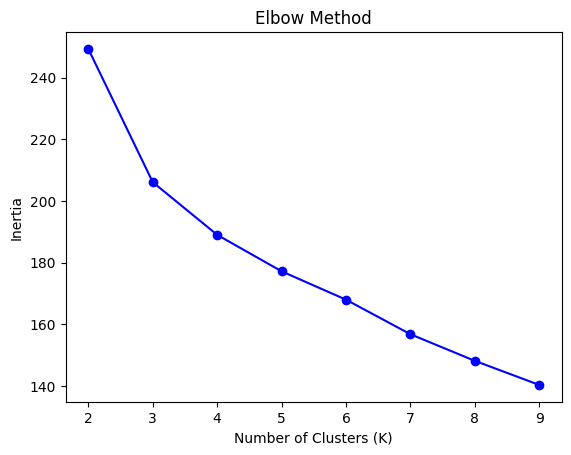

In [56]:
inertias = []
k_values = range(2, 10)
# Compute the inertia for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=12)
    kmeans.fit(norm_df)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Silhouette coefficient

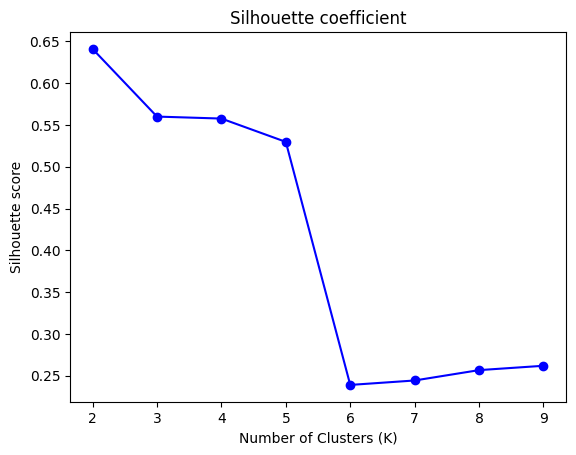

In [47]:
silhouette_score = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=12)
    kmeans.fit(norm_df)
    cluster_labels = kmeans.labels_
    score = metrics.silhouette_score(norm_df, cluster_labels)
    silhouette_score.append(score)

# Plot the elbow curve
plt.plot(k_values, silhouette_score, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette coefficient')
plt.show()

### Using PCA

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(norm_df)
df_pca = pca.transform(norm_df)
df_pca

array([[-0.60007076, -0.00478369],
       [ 0.29462778, -0.33045687],
       [-0.61468958, -0.05987433],
       ...,
       [-0.74249207,  0.01548886],
       [ 1.31221677,  0.7772111 ],
       [ 1.05110688,  0.10994061]])

In [49]:
pca.explained_variance_ratio_.sum()

0.7881417154219347

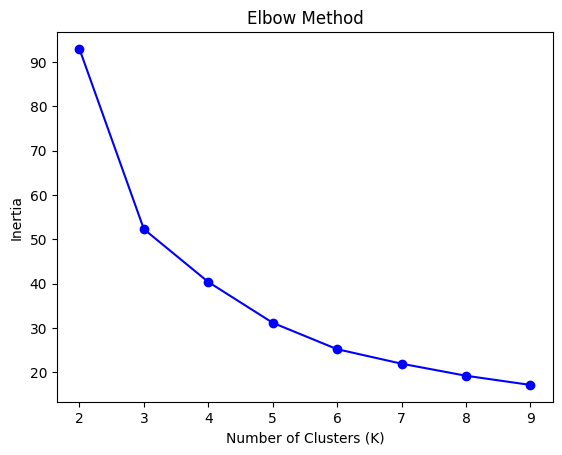

In [50]:
inertias = []
k_values = range(2, 10)
# Compute the inertia for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=12)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

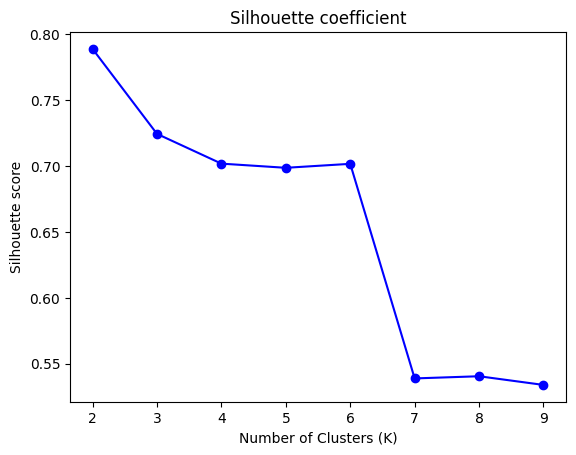

In [51]:
silhouette_score = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=12)
    kmeans.fit(df_pca)
    cluster_labels = kmeans.labels_
    score = metrics.silhouette_score(df_pca, cluster_labels)
    silhouette_score.append(score)

# Plot the elbow curve
plt.plot(k_values, silhouette_score, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette coefficient')
plt.show()

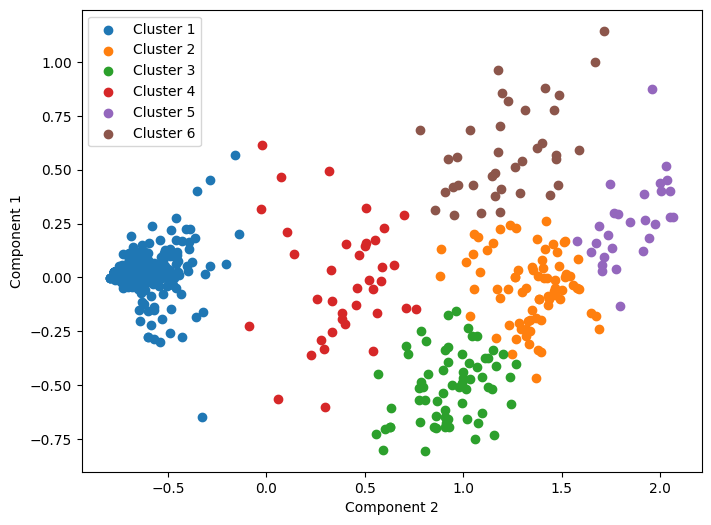

In [52]:
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=6, n_init=12)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_
u_labels = np.unique(cluster_labels)

for i in u_labels:
    plt.scatter(df_pca[cluster_labels == i , 0], df_pca[cluster_labels == i , 1], label=f"Cluster {i+1}")
plt.ylabel('Component 1')
plt.xlabel('Component 2')
plt.legend()
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [57]:
from sklearn.cluster import DBSCAN

# Assuming you have a dataset X

# Create a DBSCAN object with the desired epsilon and min_samples values
epsilon = 0.5
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit the DBSCAN model to the data
dbscan.fit(norm_df)

# Get the cluster labels and the number of clusters (-1 represents noise/outliers)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Print the cluster labels and the number of clusters
print("Number of clusters:", n_clusters)
print("Number of outliers: ", labels[labels == -1].size)

Number of clusters: 5
Number of outliers:  140


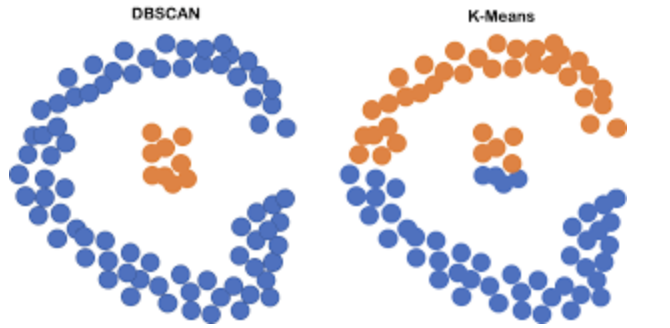

### Outlier detection

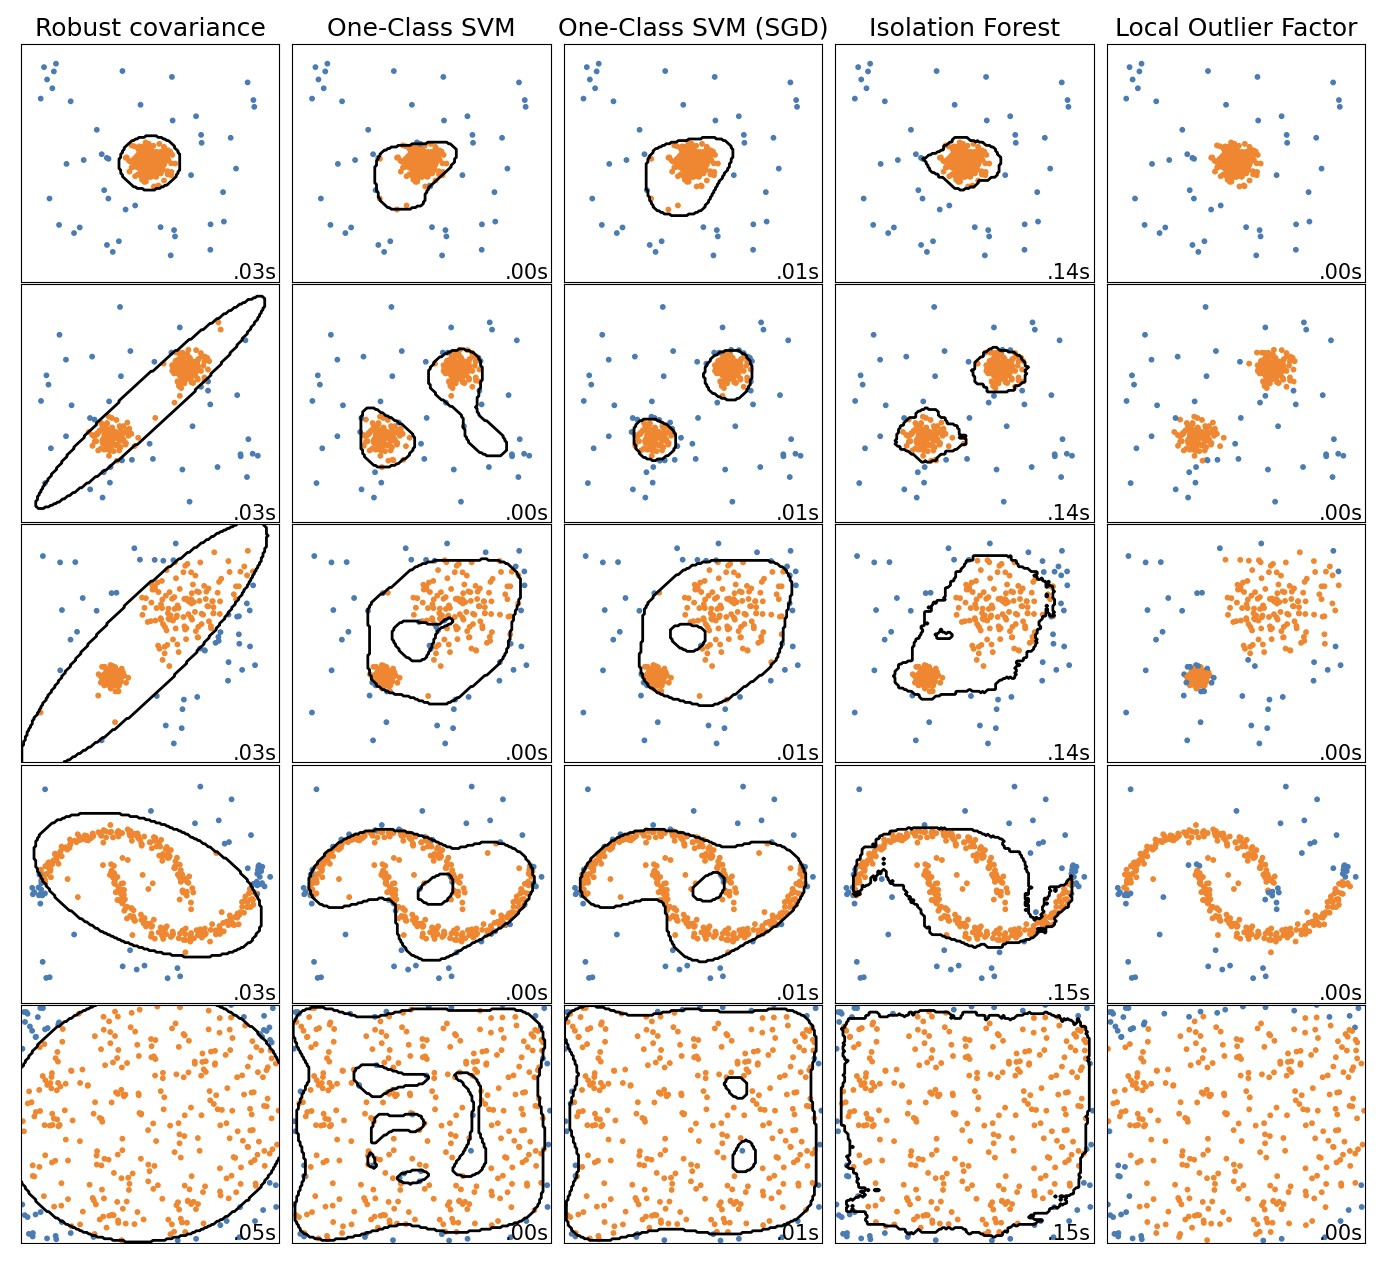

Ref: https://scikit-learn.org/stable/modules/outlier_detection.html